## Initialise

In [1]:
import qcodes as qc
import numpy as np
import sys
%matplotlib nbagg

helper_fns_folder = '/Users/Natalie/Documents/PhD/Qdev/QcodesRelated/HelperScripts'# r'C:\Users\qcodes-natalie\Qcodes-contrib' # TODO: enter path to transmon helper folder
if helper_fns_folder not in sys.path:
    sys.path.insert(0, helper_fns_folder)

from qdev_transmon_helpers import *

In [2]:
set_sample_name('testing_bugs')

In [3]:
set_file_locations()

Set up python log location: /Users/Natalie/Documents/PhD/Qdev/QcodesRelated/Qcodes_test_data/testing_bugs/log_files/python_logs/
-------------------------
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/Natalie/Documents/PhD/Qdev/QcodesRelated/Qcodes_test_data/testing_bugs/log_files/jupyter_logs/2017-06-30_19-09-47_ipythonlogfile.txt
Mode           : append
Output logging : False
Raw input log  : False
Timestamping   : True
State          : active
Set up jupyter log location: /Users/Natalie/Documents/PhD/Qdev/QcodesRelated/Qcodes_test_data/testing_bugs/log_files/jupyter_logs/
-------------------------
Set data location: /Users/Natalie/Documents/PhD/Qdev/QcodesRelated/Qcodes_test_data/testing_bugs/data/
-------------------------
Set data file format: {counter}
-------------------------
Set up analysis location: /Users/Natalie/Documents/PhD/Qdev/QcodesRelated/Qcodes_test_data/testing_bugs/analysis/
-------------------------
Set up pulse loc

In [4]:
set_qubit_count(3)

In [5]:
set_current_qubit(1)

calib dict not found, making one


In [6]:
station = qc.Station()

In [7]:
get_qubit_count()

3

In [12]:
get_calibration_dict()

defaultdict(<function qdev_transmon_helpers.temp_dict_funtions.dd_f>,
            {'current_qubit': 1,
             'cycle_time': array([  2.00000000e-05,   2.00000000e-05,   2.00000000e-05]),
             'marker_readout_delay': array([0, 0, 0]),
             'marker_time': array([  5.00000000e-07,   5.00000000e-07,   5.00000000e-07]),
             'pi_half_pulse_amp': array([ 0.5,  0.5,  0.5]),
             'pi_half_pulse_dur': array([None, None, None], dtype=object),
             'pi_half_pulse_sigma': array([None, None, None], dtype=object),
             'pi_pulse_amp': array([1, 1, 1]),
             'pi_pulse_dur': array([None, None, None], dtype=object),
             'pi_pulse_sigma': array([None, 1e-08, None], dtype=object),
             'pulse_end': array([  1.00000000e-05,   1.00000000e-05,   1.00000000e-05]),
             'pulse_mod_time': array([  1.50000000e-06,   1.50000000e-06,   1.50000000e-06]),
             'pulse_readout_delay': array([  3.00000000e-08,   3.00000000e-

In [10]:
set_calibration_val('pi_pulse_sigma', 10e-9)

In [13]:
all_xq = make_allxy_sequence()

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [2]:
set_sample_name('my_sample') # TODO: enter sample name
set_qubit_count(3)
set_file_locations()

# vna = helpers.import_vna()
# dec_slots, dec_chans = helpers.import_decadac()
dummy_time = import_manual_param()

Set up python log location: C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/log_files/python_logs/
-------------------------
Activating auto-logging. Current session state plus future input saved.
Filename       : C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/log_files/jupyter_logs/2017-03-18_14-26_ipythonlogfile.txt
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : True
State          : active
Set up jupyter log location: C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/log_files/jupyter_logs/
-------------------------
Set data location: C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/data/
-------------------------
Set data file format: {counter}
-------------------------
Set up analysis location: C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/analysis/
-------------------------
imported manual parameter: 'dummy_time'
---------

In [3]:
dummy_time(3)
data, plots = measure(dummy_time)

DataSet:
   mode     = DataMode.LOCAL
   location = 'C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/data/001'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | single_set | single       | (1,)
   Measured | dummy_time | dummy_time   | (1,)
acquired at 2017-03-18 14:26:38


In [10]:
get_latest_counter()

7

In [14]:
[re.findall(r'\d+', f) for f in os.listdir(path)]

[[], ['003'], ['001'], ['002']]

## Find all Resonators

In [4]:
# actual measurement

resonator_sweep_setup(v1)
data, plot = measure(v1.trace)

DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/KDP78C0_qcodes3/data/027'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | frequency     | frequency    | (2001,)
   Measured | VNA_magnitude | magnitude    | (2001,)
   Measured | VNA_phase     | phase        | (2001,)
acquired at 2017-01-10 18:09:50


In [2]:
# load data
data, plot = load(12)

### Find Resonator Positions

<IPython.core.display.Javascript object>


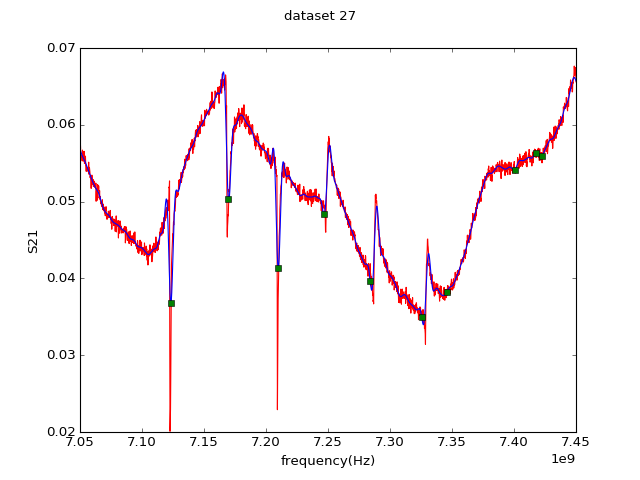

10 resonances found at [  7.12320000e+09   7.16960000e+09   7.20980000e+09   7.24640000e+09
   7.28400000e+09   7.32560000e+09   7.34580000e+09   7.40060000e+09
   7.41740000e+09   7.42220000e+09]


In [5]:
#fs = 400e6 * 2001 # sampling frequency used for smoothing  (ie span * npts)

fs = (v1.stop.get_latest() - v1.start.get_latest()) * v1.npts.get_latest()

indices, resonances_array, res_attempt_plot = find_peaks(data, fs)
save_plot(res_attempt_plot)

## Power Sweeps (qubits alive?)

In [9]:
# actual measurement

power_sweep_setup(v1)
pow_sweeps = []

for f in resonances_array:
    dat, pl = do_power_sweep(v1, f)
    pow_sweeps.append(dat)

DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/KDP78C0_qcodes3/data/028'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | VNA_power_set | power        | (41,)
   Measured | frequency     | frequency    | (41, 201)
   Measured | VNA_magnitude | magnitude    | (41, 201)
   Measured | VNA_phase     | phase        | (41, 201)
started at 2017-01-10 18:11:46
DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/KDP78C0_qcodes3/data/029'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | VNA_power_set | power        | (41,)
   Measured | frequency     | frequency    | (41, 201)
   Measured | VNA_magnitude | magnitude    | (41, 201)
   Measured | VNA_phase     | phase        | (41, 201)
started at 2017-01-10 18:12:31
DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/KDP78C0_qcodes3